<a href="https://colab.research.google.com/github/JosephPLim/food_sales_predictions/blob/main/Food_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>Food Sales Analysis</center>

Joseph Lim


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


Data Dictionary


| Variable Name             | Description                                                                                         |   |   |   |
|---------------------------|-----------------------------------------------------------------------------------------------------|---|---|---|
| Item_Identifier           | Unique product ID                                                                                   |   |   |   |
| Item_Weight               | Weight of product                                                                                   |   |   |   |
| Item_Fat_Content          | Whether the product is low fat or regular                                                           |   |   |   |
| Item_Visibility           | The percentage of total display area of all products in a store allocated to the particular product |   |   |   |
| Item_Type                 | The category to which the product belongs                                                           |   |   |   |
| Item_MRP                  | Maximum Retail Price (list price) of the product                                                    |   |   |   |
| Outlet_Identifier         | Unique store ID                                                                                     |   |   |   |
| Outlet_Establishment_Year | The year in which store was established                                                             |   |   |   |
| Outlet_Size               | The size of the store in terms of ground area covered                                               |   |   |   |
| Outlet_Location_Type      | The type of area in which the store is located                                                      |   |   |   |
| Outlet_Type               | Whether the outlet is a grocery store or some sort of supermarket                                   |   |   |   |
| Item_Outlet_Sales         | Sales of the product in the particular store. This is the target variable to be predicted.          |   |   |   |

##Loading Data

In [2]:
filename = "/content/drive/MyDrive/eLearning/CodingDojo - Data Science/Portfolio Projects/sales_predictions.csv"
df = pd.read_csv(filename)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


##Data Cleaning

In [4]:
#number of rows and columns
df.shape

(8523, 12)

In [5]:
#Datatype for each variable
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [6]:
#drop duplicates
df.duplicated().sum()

0

In [7]:
#Identify missing values
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

<center>Addressing missing values in Outlet_Size and Item_Weight columns</center>

In [8]:
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [9]:
#exploring missing values to look for a correlation in item_weight
weight_filter = df["Item_Weight"] >= 0
weight_filter = ~weight_filter
df[weight_filter].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362


In [10]:
df["Outlet_Identifier"].nunique()

10

In [11]:
#exploring missing size values to look for a correlation in outlet_identifier
size_filterS = df["Outlet_Size"] != "Small"
size_filterM = df["Outlet_Size"] != "Medium"
size_filterH = df["Outlet_Size"] != "High"

test_df = df[size_filterS & size_filterM & size_filterH]
print(test_df['Outlet_Identifier'].head())
print("")
test_df.nunique()

3     OUT010
8     OUT045
9     OUT017
25    OUT017
28    OUT010
Name: Outlet_Identifier, dtype: object



Item_Identifier              1393
Item_Weight                   393
Item_Fat_Content                5
Item_Visibility              2240
Item_Type                      16
Item_MRP                     2178
Outlet_Identifier               3
Outlet_Establishment_Year       3
Outlet_Size                     0
Outlet_Location_Type            2
Outlet_Type                     2
Item_Outlet_Sales            1627
dtype: int64

For the Outlet Size, I do not believe the size of the outlet should affect sales of the product in the store. Analysis of this column shows that 3/10 stores have missing Outlet Size values. Since \> 50% of the data is still there, we'll put in "NA" for values in that column that are missing.

Item Weight missing values are filled in with the average weight of all items (mean imputation). While the process is mean-centered, there are no current techniques that work better aside from median-imputation or deleting the data. Previous iterations did remove the data, but it has been decided to keep the datafor later usage.

In [12]:
item_weight_mean = df["Item_Weight"].mean()
df["Item_Weight"].fillna(item_weight_mean, inplace=True)
df['Outlet_Size'].fillna('NA', inplace=True)

In [13]:
# Confirming that there are no missing values after addressing them.
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [14]:
# Finding and fixing any inconsistent categories of data 

#Based off of the data dictionary, we need to fix the following:
#Item fat content, Item type, outlet establishment year, outlet size,
#outlet location type, outlet type
df["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [15]:
#Fixing Item Fat Content to Low Fat and Regular Values
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace("LF", "Low Fat")
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace("low fat", "Low Fat")
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace("reg", "Regular")
df["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [16]:
#No need to fix Item Type, everything looks good
df["Item_Type"].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [17]:
#No need to fix Outlet Establishment Year, everything looks good
df["Outlet_Establishment_Year"].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [18]:
#No need to fix Outlet_Size, everything looks good
df["Outlet_Size"].value_counts()

Medium    2793
NA        2410
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [19]:
#No need to fix Outlet Location Type, everything looks good
df["Outlet_Location_Type"].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [20]:
#No need to fix Outlet Type, everything looks good
df["Outlet_Type"].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [22]:
#Obtaining the summary statistics of all numerical columns
df.describe().loc[["min", "max", "mean"]]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
min,4.555000,0.000000,31.290000,1985.000000,33.290000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914


##Exploratory Visuals

Histogram to view the distributions of various features in your dataset

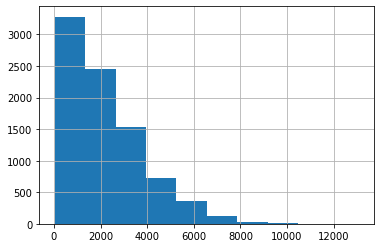

In [23]:
df["Item_Outlet_Sales"].hist()

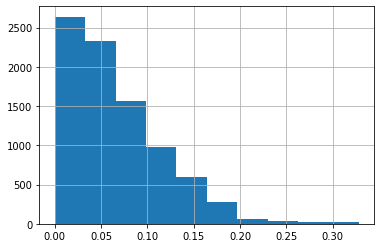

In [24]:
df["Item_Visibility"].hist()

Boxplot to view statistical summaries of various features in your dataset.

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0.5, 1.0, '')

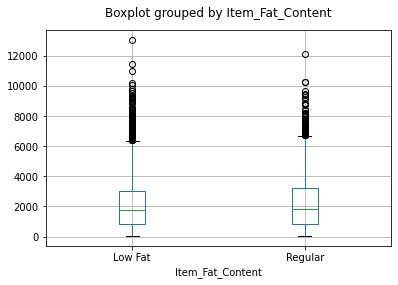

In [25]:
df.boxplot(column = 'Item_Outlet_Sales', by = 'Item_Fat_Content');
plt.title("")

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0.5, 1.0, '')

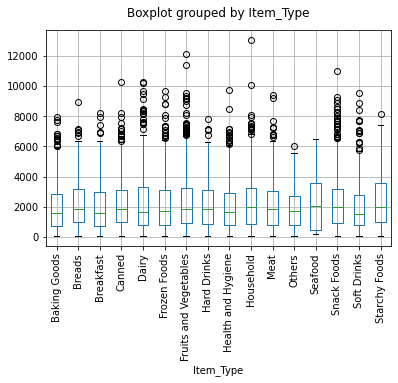

In [26]:
df.boxplot(column = 'Item_Outlet_Sales', by = 'Item_Type', rot = 90);
plt.title("")
#item rotation via:https://stackoverflow.com/questions/32244019/how-to-rotate-x-axis-tick-labels-in-a-pandas-plot

Heatmap of the correlation between features

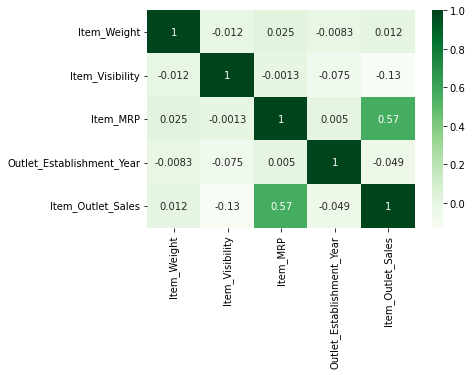

In [27]:
corr = df.corr()

sns.heatmap(corr, cmap = 'Greens', annot = True)

##Explanatory Visuals

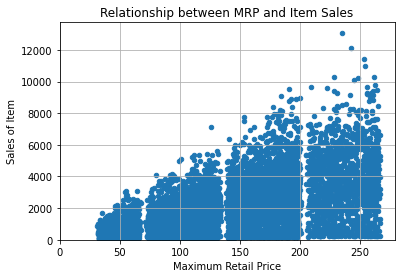

In [28]:
df.plot.scatter(x = "Item_MRP", y = "Item_Outlet_Sales")
plt.title("Relationship between MRP and Item Sales")
plt.xlabel("Maximum Retail Price")
plt.ylabel("Sales of Item")
plt.xlim(0)
plt.ylim(0)
plt.grid()

From our heat map shown in the "Exploratory Visuals" Section, we know that there is some correlation between an Item's Maximum Retail Price (MRP) and the Sales of the Product at a specific store.

Utilizing a scatter plot, we can see that as the MRP increases, the potential for sales generated by that item also increases, and the two are positively correlated. We can alo see that there seem to be discrepancies at 75, 140, and 200 MRP.

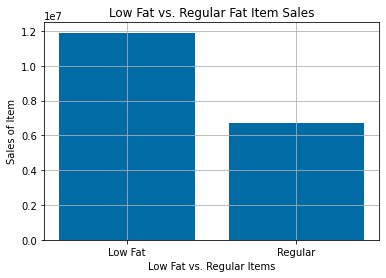

In [29]:
barplot = df.groupby("Item_Fat_Content")["Item_Outlet_Sales"].sum()
plt.style.use("tableau-colorblind10")
plt.bar(barplot.index, barplot.values)

plt.title("Low Fat vs. Regular Fat Item Sales")
plt.xlabel("Low Fat vs. Regular Items")
plt.ylabel("Sales of Item")
plt.grid()

Utilizing a bar chart, we can see that the overall sales of Low Fat items is greater than the overall sales of Regular Fat items.